In [1]:
# import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df1 = pd.read_csv('values.csv')
df2 = pd.read_csv('labels.csv')
data = pd.merge(df1,df2)

In [3]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [4]:
data.shape

(180, 15)

In [5]:
# data preprocessing
# droping instant and dteday columns
data=data.drop(columns=['patient_id'],axis=1)

In [6]:
data.shape

(180, 14)

In [7]:
data['heart_disease_present']

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [8]:
data.size

2520

In [9]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [10]:
# checking value count and info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [11]:
# checking null value in dataset
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [12]:
data['sex'].value_counts()

1    124
0     56
Name: sex, dtype: int64

In [13]:
data.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [14]:
# checking correlation of day data
corr = data.corr()
corr['heart_disease_present'].sort_values(ascending = False)

heart_disease_present                   1.000000
exercise_induced_angina                 0.448647
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
resting_ekg_results                     0.145933
age                                     0.138255
serum_cholesterol_mg_per_dl             0.079775
resting_blood_pressure                  0.078506
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
max_heart_rate_achieved                -0.375352
Name: heart_disease_present, dtype: float64

# Visuallization

array([[<AxesSubplot:title={'center':'slope_of_peak_exercise_st_segment'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>,
        <AxesSubplot:title={'center':'chest_pain_type'}>,
        <AxesSubplot:title={'center':'num_major_vessels'}>],
       [<AxesSubplot:title={'center':'fasting_blood_sugar_gt_120_mg_per_dl'}>,
        <AxesSubplot:title={'center':'resting_ekg_results'}>,
        <AxesSubplot:title={'center':'serum_cholesterol_mg_per_dl'}>,
        <AxesSubplot:title={'center':'oldpeak_eq_st_depression'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'max_heart_rate_achieved'}>,
        <AxesSubplot:title={'center':'exercise_induced_angina'}>],
       [<AxesSubplot:title={'center':'heart_disease_present'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

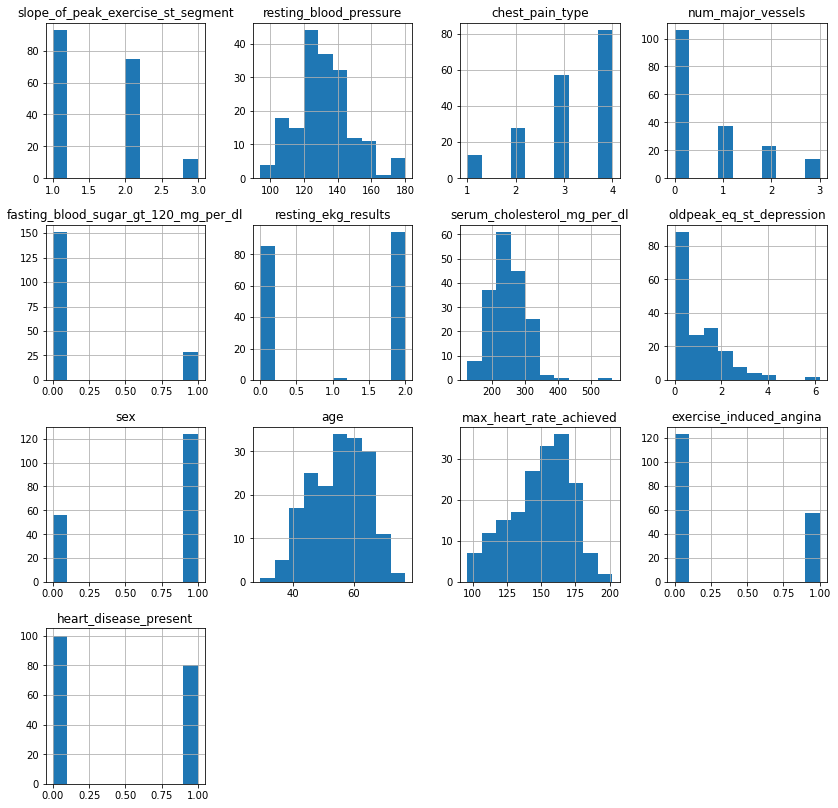

In [15]:
data.hist(figsize=(14,14))

<AxesSubplot:xlabel='sex', ylabel='heart_disease_present'>

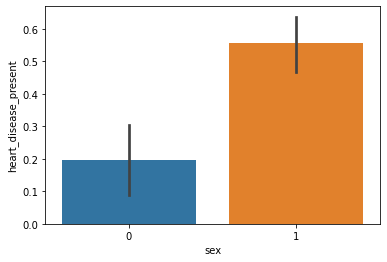

In [16]:
sns.barplot(data['sex'],data['heart_disease_present'])

<AxesSubplot:xlabel='sex', ylabel='age'>

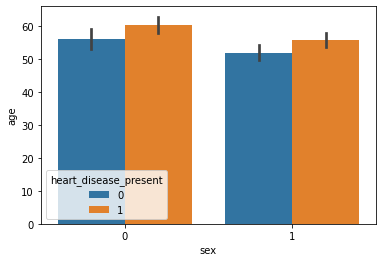

In [17]:
sns.barplot(data['sex'],data['age'],hue=data['heart_disease_present'])

<AxesSubplot:xlabel='thal', ylabel='heart_disease_present'>

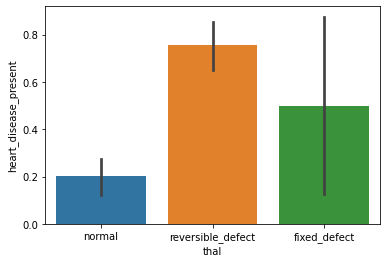

In [18]:
sns.barplot(data['thal'],data['heart_disease_present'])

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='heart_disease_present'>

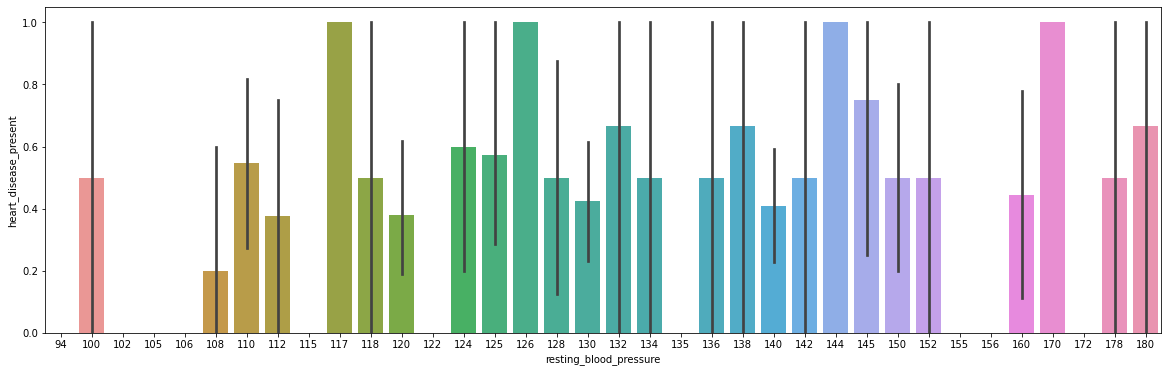

In [19]:
#Bar plot for resting blood pressure distribution of heart disease present
fig = plt.figure(figsize=(20,6))
sns.barplot(data['resting_blood_pressure'],data['heart_disease_present'])

<AxesSubplot:xlabel='max_heart_rate_achieved', ylabel='heart_disease_present'>

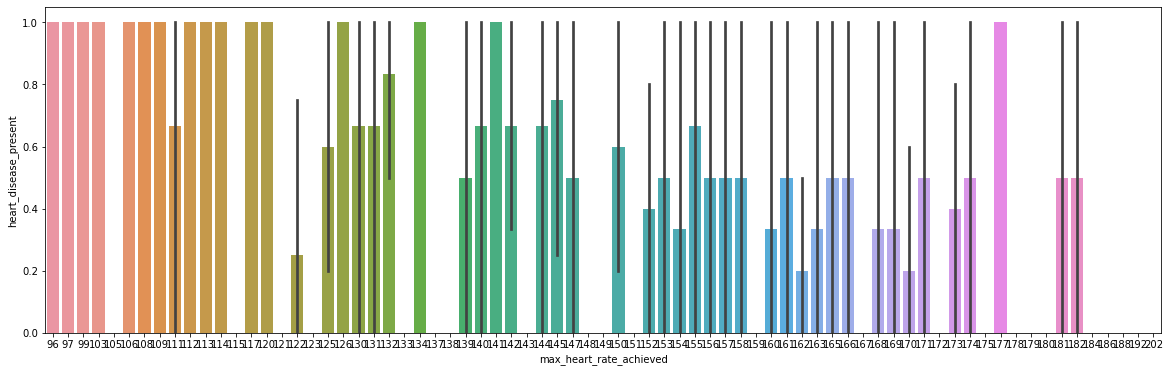

In [20]:
#Bar plot for max heart rate achieved of heart disease present
fig = plt.figure(figsize=(20,6))
sns.barplot(data['max_heart_rate_achieved'],data['heart_disease_present'])

In [21]:
# numerical and categorial value
numeric_columns =['oldpeak_eq_st_depression','age','serum_cholesterol_mg_per_dl','resting_blood_pressure']

<Figure size 1008x720 with 0 Axes>

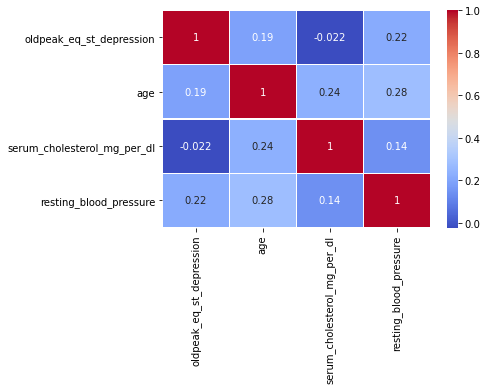

<Figure size 1008x720 with 0 Axes>

In [22]:
# heatmap
sns.heatmap(data[numeric_columns].corr(),annot=True,cmap='coolwarm',linewidth=0.1)
plt.figure(figsize=(14,10))

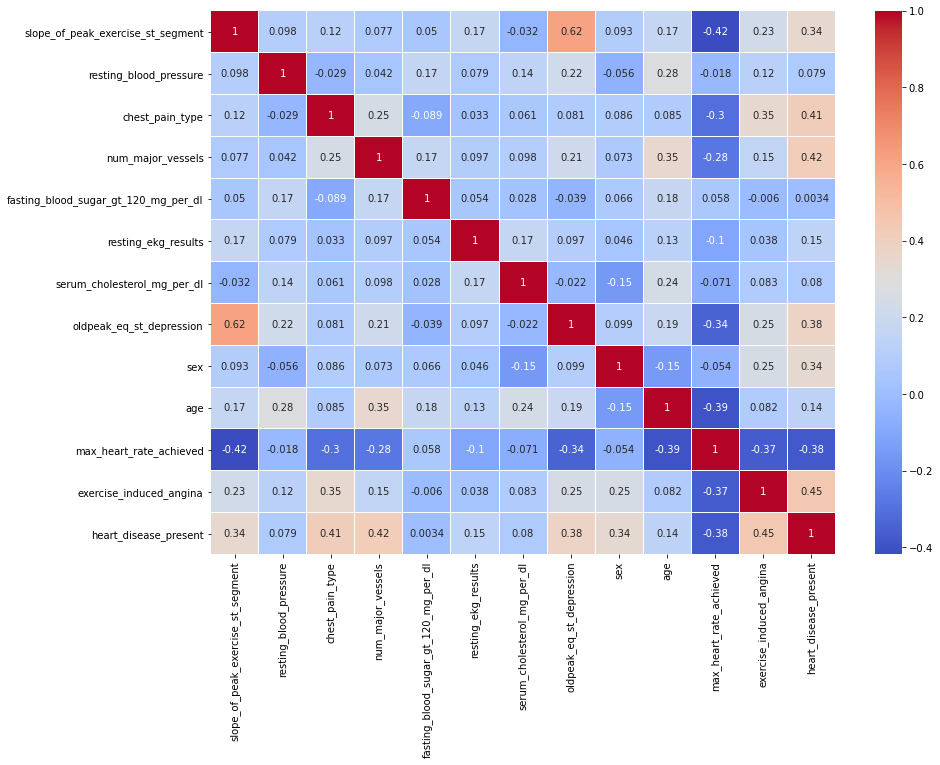

In [23]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), linewidths=.01, annot = True, cmap='coolwarm')
plt.show()

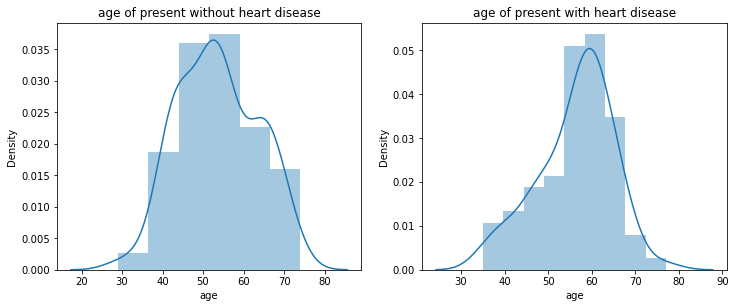

In [24]:
# create distplot
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(data[data['heart_disease_present']==0].age)
plt.title('age of present without heart disease')

plt.subplot(222)
sns.distplot(data[data['heart_disease_present']==1].age)
plt.title('age of present with heart disease')
plt.show()

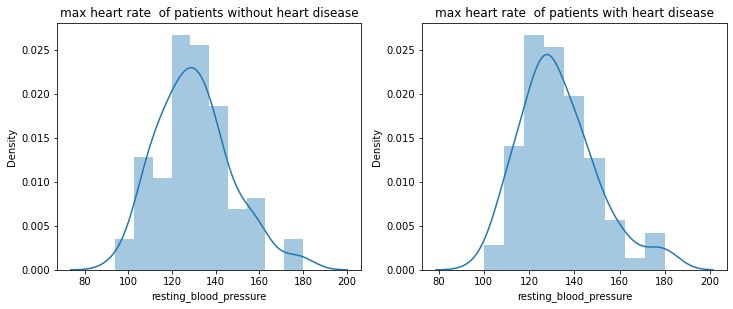

In [25]:
# create distplot
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(data[data['heart_disease_present']==0].resting_blood_pressure)
plt.title('max heart rate  of patients without heart disease')

plt.subplot(222)
sns.distplot(data[data['heart_disease_present']==1].resting_blood_pressure)
plt.title('max heart rate  of patients with heart disease')
plt.show()

# Data preprocessing

In [26]:
# train_test_split
x = data.loc[:,['resting_blood_pressure','chest_pain_type','fasting_blood_sugar_gt_120_mg_per_dl','serum_cholesterol_mg_per_dl','max_heart_rate_achieved','exercise_induced_angina','age','sex','oldpeak_eq_st_depression']]
y = data.heart_disease_present

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [28]:
x_train.shape

(126, 9)

In [29]:
x_test.shape

(54, 9)

In [30]:
y_test.size

54

In [31]:
# Linear Regression
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.32311412526355743

In [32]:
y_test

150    0
87     1
68     0
151    0
120    1
72     0
60     0
10     0
138    0
109    1
49     0
20     0
78     1
59     1
67     0
116    0
55     0
47     0
19     1
101    0
121    0
1      0
144    1
70     0
52     1
69     1
83     1
97     0
76     0
56     1
111    0
129    1
114    0
174    0
170    1
7      1
26     0
39     1
179    0
46     0
61     1
24     0
58     0
128    1
21     0
81     1
90     0
63     0
171    1
136    1
159    1
75     1
43     0
152    1
Name: heart_disease_present, dtype: int64

In [33]:
y_predict


array([ 3.60463627e-01,  4.01613364e-01,  3.50365716e-02,  4.88782309e-01,
        2.72870570e-01,  2.21694546e-01,  9.41811428e-01,  7.27316689e-01,
        2.40130962e-01,  6.12685423e-01, -2.41027609e-01, -1.29759654e-02,
        1.04528716e+00,  3.78305767e-01,  7.51051549e-01,  1.07543275e-01,
        3.75881407e-01,  3.05546426e-01,  7.00383928e-04,  1.20954304e-01,
       -2.14078515e-01,  1.94412712e-01,  8.69987381e-01,  1.06320157e-01,
        1.05422330e+00,  5.44528522e-01,  1.07455193e+00,  3.62788512e-02,
       -1.26006665e-01,  1.03709596e+00, -3.73941742e-03,  1.02395223e+00,
        3.19008145e-01,  6.30891082e-01,  7.83334523e-01,  7.64053408e-01,
        2.84945089e-01,  5.75743843e-01, -1.58592708e-01,  6.62094888e-01,
        5.37465664e-01,  1.93028317e-01,  2.74760826e-01,  8.41112816e-01,
        5.39394900e-01,  6.75398845e-01, -1.29181915e-01, -2.85372138e-01,
        6.09486208e-01,  5.83612439e-01,  8.75439077e-01,  2.43001585e-01,
        4.73351503e-01,  

In [34]:
pd.crosstab(y_test,y_predict)

col_0,-0.285372,-0.241028,-0.214079,-0.158593,-0.129182,-0.126007,-0.012976,-0.003739,0.000700,0.035037,...,0.783335,0.841113,0.869987,0.875439,0.941811,1.023952,1.037096,1.045287,1.054223,1.074552
heart_disease_present,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,1,1,1,1,1


In [35]:
# Logistic regression
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7962962962962963

In [36]:
y_test

150    0
87     1
68     0
151    0
120    1
72     0
60     0
10     0
138    0
109    1
49     0
20     0
78     1
59     1
67     0
116    0
55     0
47     0
19     1
101    0
121    0
1      0
144    1
70     0
52     1
69     1
83     1
97     0
76     0
56     1
111    0
129    1
114    0
174    0
170    1
7      1
26     0
39     1
179    0
46     0
61     1
24     0
58     0
128    1
21     0
81     1
90     0
63     0
171    1
136    1
159    1
75     1
43     0
152    1
Name: heart_disease_present, dtype: int64

In [37]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [38]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,25,6
1,5,18


In [39]:
confusion_matrix(y_test,y_predict)

array([[25,  6],
       [ 5, 18]], dtype=int64)

In [40]:
precision_score(y_test,y_predict)

0.75

In [41]:
recall_score(y_test,y_predict)

0.782608695652174

In [42]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.75      0.78      0.77        23

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54



In [43]:
# decision tree model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7222222222222222

In [44]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,23,8
1,7,16


In [54]:
confusion_matrix(y_test,y_predict)

array([[24,  7],
       [16,  7]], dtype=int64)

In [55]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.60      0.77      0.68        31
           1       0.50      0.30      0.38        23

    accuracy                           0.57        54
   macro avg       0.55      0.54      0.53        54
weighted avg       0.56      0.57      0.55        54



In [45]:
# random forest classifier model
model = RandomForestClassifier(random_state=10,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7777777777777778

In [46]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,27,4
1,8,15


In [47]:
# KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.5925925925925926

In [48]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,21,10
1,12,11


In [49]:
#Support Vector Machine
model = SVC(kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.5740740740740741

In [50]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,24,7
1,16,7


In [51]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "LinearRegression": LinearRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "Suport Victor Machine":SVC()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [52]:

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7962962962962963,
 'LinearRegression': 0.32311412526355743,
 'KNN': 0.5925925925925926,
 'Random Forest': 0.7592592592592593,
 'DecisionTree': 0.6851851851851852,
 'Suport Victor Machine': 0.5740740740740741}

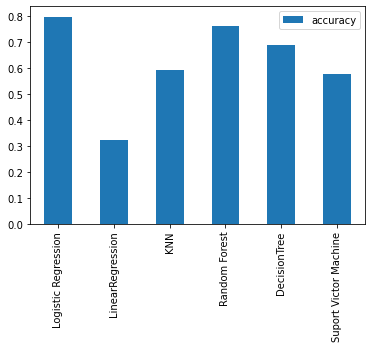

In [53]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();